In [1]:
using Plots
using Flux
using DiffEqFlux
using OrdinaryDiffEq
using Random

Loss: 0.21291069663439555
Loss: 0.34814211750985335
Loss: 0.18992081852497938
Loss: 0.15578924453260287
Loss: 0.1970083177950343
Loss: 0.19265281855063032
Loss: 0.1546232946280439
Loss: 0.12627568210218407
Loss: 0.12297661889378911
Loss: 0.133208450789208
Loss: 0.13836613374490997
Loss: 0.13136179155543073
Loss: 0.11727443291244077
Loss: 0.10445842019206682
Loss: 0.0978291231882517
Loss: 0.09710943447397283
Loss: 0.09853540679355492
Loss: 0.09805911386389152
Loss: 0.09402304580773853
Loss: 0.08765591634143956
Loss: 0.08155250892132522
Loss: 0.07769528703626861
Loss: 0.07631055219740301
Loss: 0.07601084611059271
Loss: 0.07494706350652926
Loss: 0.07209860438504956
Loss: 0.06778301834443842
Loss: 0.06317609651221098
Loss: 0.059372696921266774
Loss: 0.05667341990556569
Loss: 0.05449570571822917
Loss: 0.05191188177860433
Loss: 0.04842010616005919
Loss: 0.04432712359157249
Loss: 0.040447730486156665
Loss: 0.037437950125302634
Loss: 0.035306204624484985
Loss: 0.03344712138626548
Loss: 0.03116

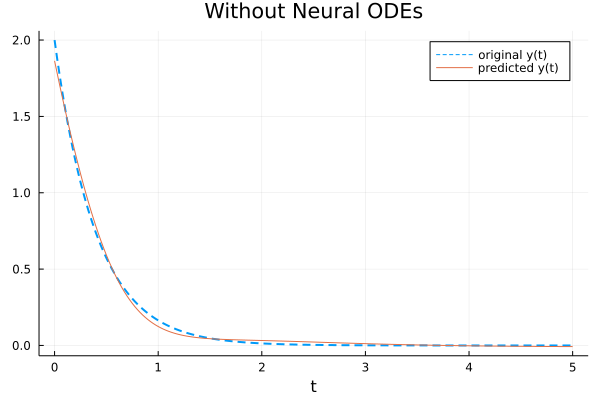

In [2]:
t0 = 0.0
tend = 5.0
N = 200
true_x = range(t0, tend, length=N+1)
true_y = 2*exp.(-true_x./0.4)

function neural_network(data_dim)
    fc = FastChain(FastDense(data_dim, 64, swish),
                  FastDense(64, 32, swish),
                  FastDense(32, data_dim))
end

nn = neural_network(1)
theta = initial_params(nn)

predict(t, p) = nn(t', p)'

loss(p) = begin
  yhat = predict(true_x, p)
  l = Flux.mse(yhat, true_y)
end

learning_rate=1e-2
opt = ADAMW(learning_rate)
epochs = 100

loss_array = []

function cb_train(theta, loss)
    println("Loss: ", loss)
    append!(loss_array, loss)
    false
end

@time res_train = DiffEqFlux.sciml_train(
    loss, theta, opt,
    maxiters = epochs,
    cb = cb_train)

predicted_y = predict(true_x, res_train.minimizer)

plot(
    true_x,
    true_y,
    linewidth=2, ls=:dash,
    title="Without Neural ODEs",
    xaxis="t",
    label="original y(t)",
    legend=:topright)

plot!(
    true_x,
    predicted_y,
    linewidth=1,
    label="predicted y(t)")

Loss: 12.249349202912887
Loss: 2.2774871756338664
Loss: 0.7971531572006076
Loss: 0.40958739468870714
Loss: 0.2708113011062246
Loss: 0.21131201079477005
Loss: 0.182526196173538
Loss: 0.1668559708332012
Loss: 0.15682413619289567
Loss: 0.1489405544522321
Loss: 0.14153208873225137
Loss: 0.133839300661082
Loss: 0.12559006477098833
Loss: 0.1167756125183274
Loss: 0.10752566063621878
Loss: 0.09803609904240178
Loss: 0.08852453336134447
Loss: 0.07920352708301051
Loss: 0.07026438315626715
Loss: 0.061867787425661486
Loss: 0.05413933658319466
Loss: 0.0471677650005988
Loss: 0.04100564207127601
Loss: 0.03567153758116164
Loss: 0.031153322457385772
Loss: 0.02741223923449278
Loss: 0.024387556911251447
Loss: 0.022001697446993092
Loss: 0.020165423580916653
Loss: 0.01878315194492846
Loss: 0.017758043816788294
Loss: 0.016996690245911616
Loss: 0.016413168829124643
Loss: 0.015932270464033976
Loss: 0.015491753242946518
Loss: 0.015043571726344728
Loss: 0.014554090644531403
Loss: 0.014003361162168658
Loss: 0.013

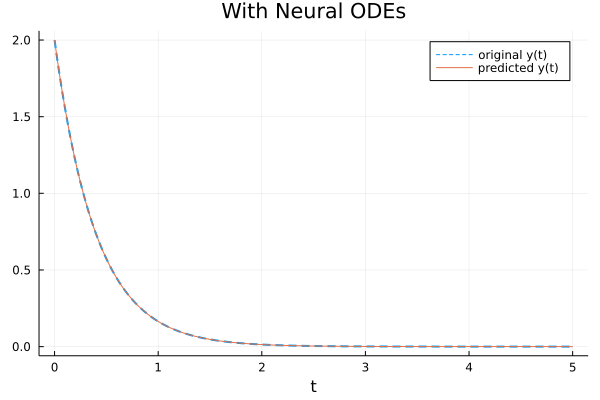

In [7]:
t0 = 0.0
tend = 5.0
N = 200
true_x = range(t0, tend, length=N+1)
true_y = 2*exp.(-true_x./0.4)

function neural_ode(data_dim; saveat = true_x)
    fc = FastChain(FastDense(data_dim, 32, swish),
                  FastDense(32, 16, swish),
                  FastDense(16, data_dim))

    n_ode = NeuralODE(
            fc,
            (minimum(true_x), maximum(true_x)),
            Tsit5(),
            saveat = saveat,
            abstol = 1e-4, reltol = 1e-4)
end

n_ode = neural_ode(1)
theta = n_ode.p

predict(p) = n_ode(true_y[1:1], p)'

loss(p) = begin
  yhat = predict(p)
  l = Flux.mse(yhat, true_y)
end

learning_rate=2e-2
opt = ADAMW(learning_rate)
epochs = 200

loss_array2 = []

function cb_train(theta, loss)
    println("Loss: ", loss)
    append!(loss_array2, loss)
    false
end

@time res_train = DiffEqFlux.sciml_train(
    loss, theta, opt,
    maxiters = epochs,
    cb = cb_train)

predicted_y = predict(res_train.minimizer)

plot(
    true_x,
    true_y,
    linewidth=2, ls=:dash,
    title="With Neural ODEs",
    xaxis="t",
    label="original y(t)",
    legend=:topright)

plot!(
    true_x,
    true_y,
    linewidth=1,
    label="predicted y(t)")

$$\frac{\partial{L}}{\partial{\mathbf{h}(t_1)}}$$